In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set the path to the main project folder
path = r'C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization'

In [4]:
# Import the orders data
climate_unscaled = pd.read_csv(os.path.join(path, 'Data Sets', 'Weather.csv'))

In [5]:
climate_unscaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [6]:
#Reduce to just the mean temperatures
df = climate_unscaled[['BASEL_temp_mean', 
              'BELGRADE_temp_mean', 
              'BUDAPEST_temp_mean', 
              'DEBILT_temp_mean', 
              'DUSSELDORF_temp_mean', 
              'HEATHROW_temp_mean', 
              'KASSEL_temp_mean', 
              'LJUBLJANA_temp_mean', 
              'MAASTRICHT_temp_mean', 
              'MADRID_temp_mean', 
              'MUNCHENB_temp_mean', 
              'OSLO_temp_mean', 
              'SONNBLICK_temp_mean', 
              'STOCKHOLM_temp_mean', 
              'VALENTIA_temp_mean']].copy()

In [7]:
df

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5
1,6.1,2.9,2.3,7.7,8.2,6.1,7.7,2.1,8.6,9.8,6.2,3.4,-9.5,4.0,8.9
2,8.5,3.1,2.7,6.8,7.1,8.4,6.5,4.6,6.9,8.6,5.8,1.9,-9.5,2.4,10.5
3,6.3,2.0,2.0,6.7,6.8,9.4,5.8,3.2,7.0,10.3,3.9,3.0,-11.5,1.2,7.4
4,3.0,2.0,2.5,8.0,7.7,8.9,5.4,3.6,8.1,12.1,1.8,3.7,-9.3,3.3,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,15.9,18.2,11.7,15.7,17.8,16.4,9.1,14.7,18.6,20.0,14.3,9.7,0.6,11.5,10.7
22946,16.7,15.9,11.7,16.0,19.4,15.8,9.1,12.9,18.9,19.1,16.1,10.9,2.3,12.5,10.7
22947,16.7,13.4,11.7,15.8,18.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,3.3,13.1,10.7
22948,15.4,15.0,11.7,14.4,16.7,15.2,9.1,14.0,16.3,15.7,14.5,5.9,3.4,7.5,10.7


In [9]:
# Import the  data answer
ans = pd.read_csv(os.path.join(path, 'Supervised', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
# Drop the 'DATE' column from the dataframe
ans = ans.drop(columns=['DATE'])
ans


,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df
y = ans

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Unscaled data
print("Before scaling - Mean: ", X_train.mean(axis=0))
print("Before scaling - Std: ", X_train.std(axis=0))

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check scaled data
print("After scaling - Mean: ", X_train_scaled.mean(axis=0))
print("After scaling - Std: ", X_train_scaled.std(axis=0))


Before scaling - Mean:  BASEL_temp_mean         10.428072
BELGRADE_temp_mean      12.694232
BUDAPEST_temp_mean      11.788698
DEBILT_temp_mean        10.065899
DUSSELDORF_temp_mean    10.765049
HEATHROW_temp_mean      11.242560
KASSEL_temp_mean         9.200773
LJUBLJANA_temp_mean     10.753312
MAASTRICHT_temp_mean    10.190229
MADRID_temp_mean        14.974951
MUNCHENB_temp_mean       9.054325
OSLO_temp_mean           6.473388
SONNBLICK_temp_mean     -5.020953
STOCKHOLM_temp_mean      7.379504
VALENTIA_temp_mean      10.749428
dtype: float64
Before scaling - Std:  BASEL_temp_mean         7.377545
BELGRADE_temp_mean      8.809524
BUDAPEST_temp_mean      8.498813
DEBILT_temp_mean        6.331617
DUSSELDORF_temp_mean    6.796782
HEATHROW_temp_mean      5.741465
KASSEL_temp_mean        6.776627
LJUBLJANA_temp_mean     8.259876
MAASTRICHT_temp_mean    6.675126
MADRID_temp_mean        7.418768
MUNCHENB_temp_mean      7.968743
OSLO_temp_mean          8.240867
SONNBLICK_temp_mean     6.848245

# Running an Artificial Neural Network (ANN) Model

In [12]:
# Define the ANN model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = mlp.predict(X_test_scaled)


In [13]:
# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix for each station
confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      1099
           1       0.75      0.84      0.79      1561
           2       0.75      0.87      0.81      1461
           3       0.72      0.61      0.66       878
           4       0.68      0.61      0.64       975
           5       0.66      0.61      0.63       935
           6       0.72      0.62      0.66       743
           7       0.76      0.78      0.77      1229
           8       0.72      0.66      0.69       933
           9       0.85      0.93      0.89      2033
          10       0.74      0.71      0.73       952
          11       0.69      0.64      0.67       675
          12       0.00      0.00      0.00         0
          13       0.72      0.70      0.71       788
          14       0.55      0.19      0.29       228

   micro avg       0.74      0.74      0.74     14490
   macro avg       0.67      0.63      0.64     14490
we

C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classif

array([[2541,  270,   34,    7,    4,   14,    0,    5,    0,   79,    0,
           1,    0,    0],
       [ 234,  552,   19,    6,    4,   11,    0,    5,    1,   44,    1,
           1,    1,    0],
       [  35,   69,   22,    4,    0,    4,    1,    2,    0,   24,    0,
           0,    1,    0],
       [  18,   21,    7,   12,    0,    4,    0,    0,    0,    2,    0,
           0,    0,    0],
       [   9,    9,    1,    1,    1,    1,    0,    0,    1,    2,    0,
           0,    0,    0],
       [  19,   11,    5,    0,    0,    8,    0,    0,    0,   23,    0,
           1,    0,    0],
       [   2,    3,    2,    0,    0,    0,    0,    0,    0,    2,    0,
           0,    0,    0],
       [  10,   11,    2,    2,    0,    5,    0,    5,    0,   11,    0,
           0,    0,    0],
       [   5,    1,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0],
       [  66,   34,    6,    4,    0,    3,    0,    4,    1,  241,    0,
           1,    

# Testing Different Parameters

In [14]:
# Trying different combinations
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, tol=0.0001, random_state=42)

mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      1099
           1       0.77      0.79      0.78      1561
           2       0.78      0.83      0.81      1461
           3       0.70      0.61      0.65       878
           4       0.69      0.65      0.67       975
           5       0.64      0.63      0.64       935
           6       0.71      0.64      0.68       743
           7       0.73      0.80      0.76      1229
           8       0.70      0.69      0.70       933
           9       0.86      0.92      0.89      2033
          10       0.71      0.73      0.72       952
          11       0.69      0.68      0.69       675
          12       0.00      0.00      0.00         0
          13       0.71      0.71      0.71       788
          14       0.57      0.28      0.38       228

   micro avg       0.74      0.74      0.74     14490
   macro avg       0.67      0.64      0.65     14490
we

C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classif

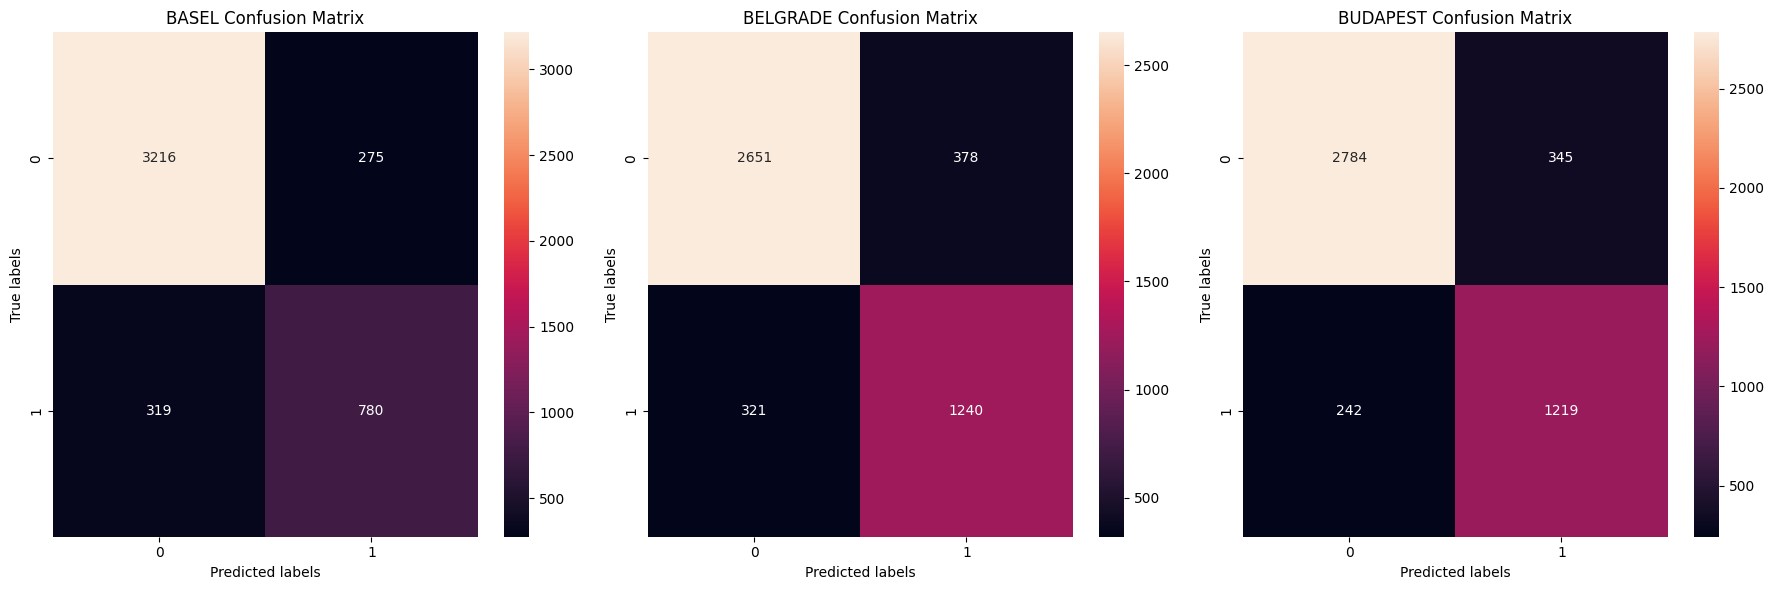

In [15]:
# Generate confusion matrices for at least 3 stations
stations = ['BASEL', 'BELGRADE', 'BUDAPEST']
figure, ax = plt.subplots(1, 3, figsize=(18, 6))
labels = ['pleasant', 'unpleasant']

for i, station in enumerate(stations):
    cm = confusion_matrix(y_test[station + '_pleasant_weather'], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[i])
    ax[i].set_xlabel('Predicted labels')
    ax[i].set_ylabel('True labels')
    ax[i].set_title(f"{station} Confusion Matrix")

plt.tight_layout()
plt.show()

### Key Observations:

#### Scaling:
- After scaling, the mean values of all features become very close to zero, and the standard deviations are normalized to 1. This indicates that scaling has effectively standardized the data, which is often crucial for improving the performance of machine learning algorithms like neural networks.

#### Initial Neural Network (ANN) Results:
- With `hidden_layer_sizes=(100,)`, `max_iter=500`, the ANN model achieved:
  - A testing accuracy of approximately **74%**.
  - Some stations have higher precision, such as **station 9** (precision of **0.85**) and **station 2** (precision of **0.75**).
  - Some stations, however, show lower precision and recall, such as **station 14** (precision of **0.55** and recall of **0.19**).
  - **Station 12** has no support, meaning the data might be missing or incomplete for this station, causing it to perform poorly.

#### Testing New Parameters:
- By adjusting the parameters with `hidden_layer_sizes=(100, 50)`, `max_iter=1000`, and a lower tolerance of `tol=0.0001`, there are slight improvements:
  - Overall performance remains similar with a testing accuracy of **74%**.
  - Precision and recall improved for some stations but decreased slightly for others, suggesting that the model is fairly stable with these parameters.

### Confusion Matrices for BASEL, BELGRADE, and BUDAPEST:

#### Key Observations:

- **BASEL:**
  - Predicted "pleasant" weather correctly in **3216** cases, but **275** times incorrectly classified as "unpleasant."
  - Misclassified **319** true "unpleasant" weather cases as "pleasant" and correctly identified **780** cases.

- **BELGRADE:**
  - Predicted "pleasant" weather correctly in **2651** cases, with **378** false negatives.
  - Correctly identified **1240** cases of "unpleasant" weather but misclassified **321** times.

- **BUDAPEST:**
  - **2784** cases of "pleasant" weather were predicted correctly, with **345** misclassifications.
  - **1219** cases of "unpleasant" weather were predicted correctly, while **242** were classified incorrectly.

The ANN model seems to perform relatively well, but as seen from the confusion matrices, there is room for improvement, particularly in reducing the number of misclassifications.
